# ETL Climate Forecast
The data used here is provided by the DWD at https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/ To simplyfy the task I've focused on a single location with the location ID 0178 (Dusseldorf). The Data including a large set of metadata is provided in a packed zip file. I've already unzipped it and for ease of use renamed the file name

In [1]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/produkt_klima_tag_19520101_20211231_01078.txt

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('produkt_klima_tag_19520101_20211231_01078.txt', sep=';')
df.head()

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,1078,19520101,5,19.0,7.6,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,eor
1,1078,19520102,5,23.1,8.3,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,eor
2,1078,19520103,5,13.1,4.6,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,eor
3,1078,19520104,5,11.6,4.9,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,eor
4,1078,19520105,5,6.4,2.5,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,eor


In [4]:
df.dtypes

STATIONS_ID      int64
MESS_DATUM       int64
QN_3             int64
  FX           float64
  FM           float64
QN_4             int64
 RSK           float64
RSKF             int64
 SDK           float64
SHK_TAG          int64
  NM           float64
 VPM           float64
  PM           float64
 TMK           float64
 UPM           float64
 TXK           float64
 TNK           float64
 TGK           float64
eor             object
dtype: object

In [5]:
df.tail()

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
25563,1078,20211227,3,10.8,5.9,3,1.0,6,1.267,0,7.0,8.9,995.08,6.5,92.00,8.4,3.7,3.4,eor
25564,1078,20211228,3,16.8,5.8,3,14.9,6,0.100,0,7.1,10.4,989.38,8.7,92.58,10.8,6.6,6.1,eor
25565,1078,20211229,3,10.5,5.2,3,6.2,6,0.183,0,7.8,11.3,1001.27,9.7,93.67,13.1,8.4,7.9,eor
25566,1078,20211230,3,14.1,6.5,3,0.1,6,0.000,0,7.6,14.2,1010.73,13.6,90.83,15.2,11.5,10.7,eor
25567,1078,20211231,3,12.0,5.7,3,0.0,6,1.433,0,6.9,12.6,1014.87,13.3,81.92,14.7,11.9,10.5,eor


In [6]:
df.drop(columns=['eor','STATIONS_ID'], inplace=True)
df.head()

,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
0,19520101,5,19.0,7.6,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,19520102,5,23.1,8.3,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,19520103,5,13.1,4.6,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,19520104,5,11.6,4.9,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,19520105,5,6.4,2.5,-999,-999.0,-999,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [7]:
df.describe()

,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
count,2.556800e+04,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000,25568.000000
mean,1.986566e+07,6.197552,8.561780,1.795412,-243.316176,-248.157290,-247.048068,-254.693465,-249.600594,-245.782498,-242.129646,508.572084,-241.600066,-193.405260,-238.539252,-244.721316,-246.219399
std,2.020602e+05,34.559105,46.102971,45.648415,436.262405,433.477571,434.110943,439.072448,432.630447,434.837514,437.046214,870.360249,437.287490,465.278181,439.068515,435.479074,434.889141
min,1.952010e+07,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.969070e+07,5.000000,7.800000,2.500000,3.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,-999.000000,962.275000,-14.300000,-999.000000,-10.375000,-20.125000,-999.000000
50%,1.986567e+07,10.000000,10.000000,3.600000,10.000000,0.000000,0.000000,1.000000,0.000000,4.700000,8.000000,1007.700000,7.400000,71.000000,10.700000,3.800000,2.300000
75%,2.004070e+07,10.000000,12.900000,5.000000,10.000000,1.200000,6.000000,5.700000,0.000000,6.700000,11.900000,1015.100000,14.400000,81.650000,19.000000,10.000000,8.300000
max,2.021123e+07,10.000000,40.300000,14.400000,10.000000,57.400000,8.000000,16.000000,27.000000,8.000000,24.000000,1042.060000,31.200000,100.000000,40.700000,24.900000,23.700000


In [8]:
df.nunique()

MESS_DATUM    25568
QN_3              4
  FX            294
  FM            124
QN_4              4
 RSK            298
RSKF              6
 SDK            599
SHK_TAG          27
  NM             82
 VPM            212
  PM           1338
 TMK            406
 UPM            714
 TXK            448
 TNK            384
 TGK            413
dtype: int64

In [9]:
# the Date is given MESS_DATUM. as the values begin in the early 1950s (note: yyyymmdd format) I am removing everything before 1991
df91 = df[df['MESS_DATUM']>19910100]

In [10]:
df91.head()

,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
14245,19910101,10,11.5,4.5,10,7.1,6,3.7,0,4.7,7.0,1010.8,4.8,82.0,6.8,2.4,1.1
14246,19910102,10,22.0,9.2,10,3.8,6,0.0,0,7.3,10.7,996.7,11.4,81.0,12.9,5.0,3.7
14247,19910103,10,23.0,5.3,10,9.2,6,0.0,0,7.3,9.6,1001.9,8.6,85.0,13.1,7.8,7.6
14248,19910104,10,15.7,6.2,10,0.4,6,4.1,0,6.3,7.9,1003.5,6.8,79.0,9.6,5.6,5.6
14249,19910105,10,17.8,7.7,10,2.9,6,1.1,0,5.3,7.1,1000.4,6.6,74.0,7.6,3.9,3.1


In [11]:
df91.describe()

,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
count,1.132300e+04,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000
mean,2.006067e+07,6.091495,6.035273,-0.717646,9.358915,2.066572,4.071801,2.147734,0.112514,5.221902,10.185313,1011.131233,11.058350,75.216049,15.245333,6.736236,4.184403
std,8.944891e+04,51.874726,69.040993,68.484887,2.019149,4.237595,2.989008,47.286290,0.991603,2.101658,13.964760,9.172135,6.783016,18.451538,7.903842,6.174058,23.984906
min,1.991010e+07,-999.000000,-999.000000,-999.000000,3.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,-999.000000,971.100000,-14.600000,-999.000000,-10.900000,-20.800000,-999.000000
25%,1.998100e+07,10.000000,7.900000,2.600000,10.000000,0.000000,0.000000,0.400000,0.000000,4.000000,7.300000,1005.600000,6.100000,68.000000,9.200000,2.300000,0.200000
50%,2.006070e+07,10.000000,10.200000,3.700000,10.000000,0.100000,6.000000,3.200000,0.000000,5.700000,9.900000,1011.500000,11.100000,77.000000,15.200000,7.000000,4.900000
75%,2.014040e+07,10.000000,12.900000,5.100000,10.000000,2.300000,6.000000,7.400000,0.000000,7.000000,13.200000,1017.100000,16.200000,84.000000,21.200000,11.500000,9.600000
max,2.021123e+07,10.000000,40.300000,13.000000,10.000000,57.400000,8.000000,16.000000,27.000000,8.000000,23.100000,1042.060000,31.200000,100.000000,40.700000,24.900000,22.600000


In [12]:
df91.nunique()

MESS_DATUM    11323
QN_3              3
  FX            263
  FM            117
QN_4              2
 RSK            272
RSKF              4
 SDK            598
SHK_TAG          22
  NM             81
 VPM            208
  PM           1295
 TMK            381
 UPM            710
 TXK            421
 TNK            355
 TGK            381
dtype: int64

In [13]:
column_headers = list(df91.columns)
print(column_headers)

['MESS_DATUM', 'QN_3', '  FX', '  FM', 'QN_4', ' RSK', 'RSKF', ' SDK', 'SHK_TAG', '  NM', ' VPM', '  PM', ' TMK', ' UPM', ' TXK', ' TNK', ' TGK']


In [14]:
column_names = ['Date','Qual_wind', 'Wind_max', 'Wind_avg','Qual_precep', 'Precepitation', 'Type_of_Precipitation',
'sunshine_hours','snow_height', 'Coverage_avg', 'Vapour_p_avg', 'Air_p_avg', 'Temp_avg', 'Rel_Humid_avg', 'Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd']
column_renamed = dict(zip(column_headers, column_names))

In [15]:
df91.rename(columns=column_renamed, inplace=True)
df91.head(1)

C:\Users\sager\AppData\Local\Temp\ipykernel_6664\584781375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df91.rename(columns=column_renamed, inplace=True)


,Date,Qual_wind,Wind_max,Wind_avg,Qual_precep,Precepitation,Type_of_Precipitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Temp_max_2m,Temp_min_2m,Temp_min_gnd
14245,19910101,10,11.5,4.5,10,7.1,6,3.7,0,4.7,7.0,1010.8,4.8,82.0,6.8,2.4,1.1


In [16]:
df91.to_parquet('Climate_day_train.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

<AxesSubplot:>

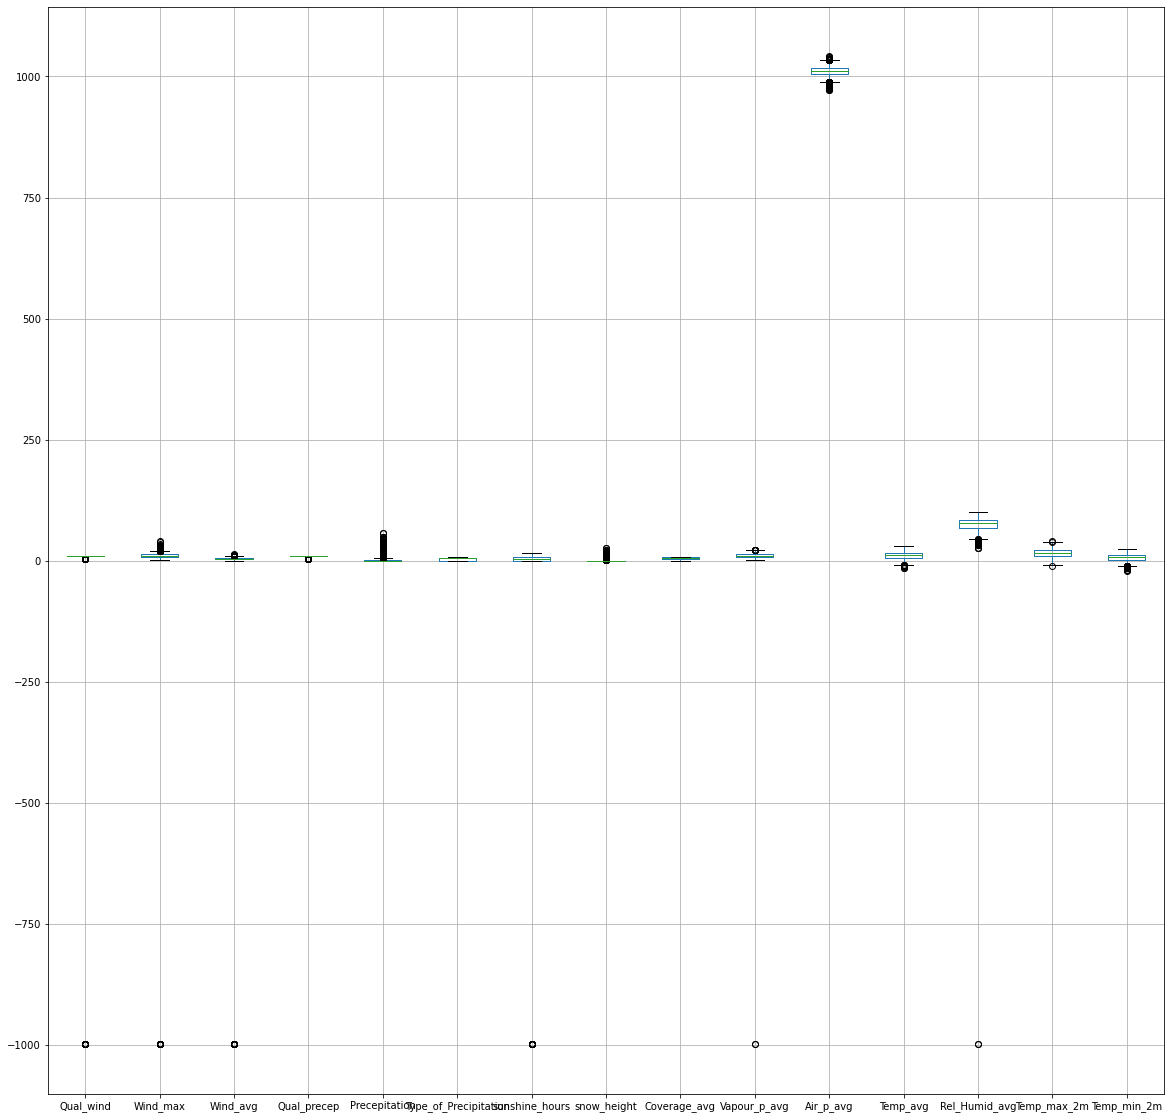

In [17]:
df91.boxplot(column= column_names[1:16], figsize=(20,20))

<AxesSubplot:>

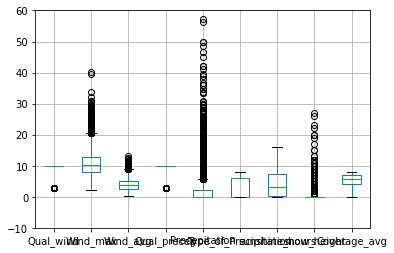

In [18]:
axy = plt.axes(ylim=(-10,60))
df91.boxplot(column= column_names[1:10], ax=axy, figsize=(20,20))

<AxesSubplot:>

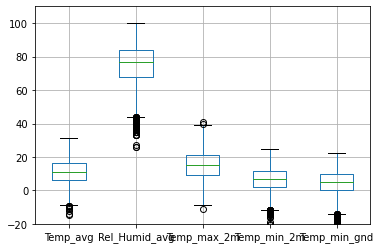

In [19]:
axy = plt.axes(ylim=(-20,110))
df91.boxplot(column= column_names[12:17], ax=axy, figsize=(20,20))

<AxesSubplot:>

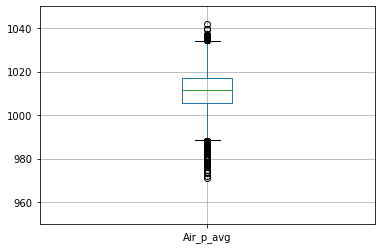

In [20]:
axy = plt.axes(ylim=(950,1050))
df91.boxplot(column= column_names[11], ax=axy)

<AxesSubplot:>

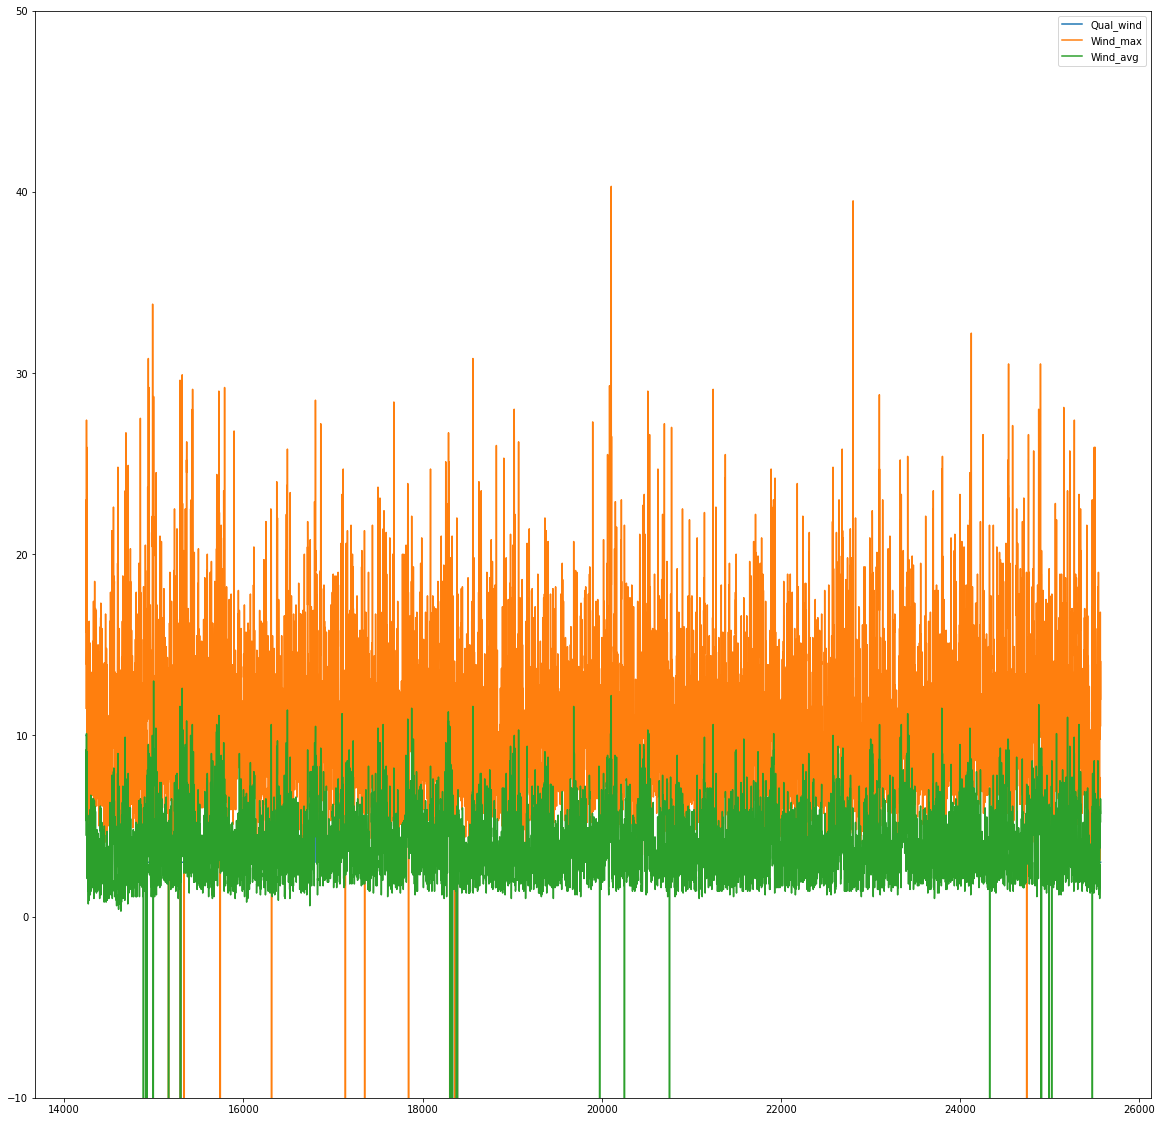

In [21]:
df91.plot(y=column_names[1:4], ax = plt.axes(ylim=(-10,50)), figsize=(20,20))

<AxesSubplot:>

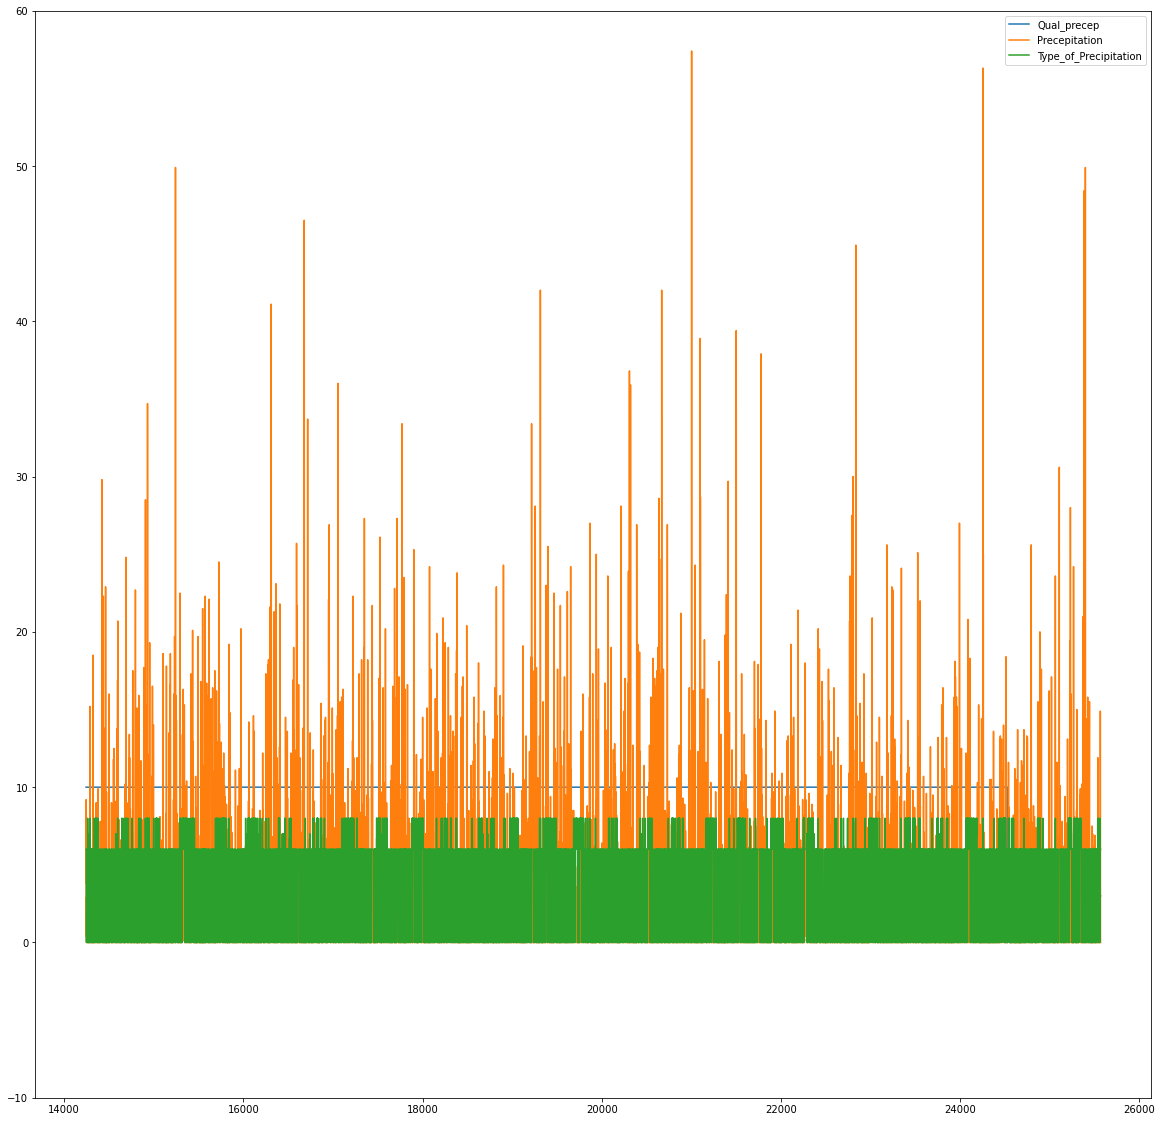

In [22]:
df91.plot(y=column_names[4:7], ax = plt.axes(ylim=(-10,60)), figsize=(20,20))

<AxesSubplot:>

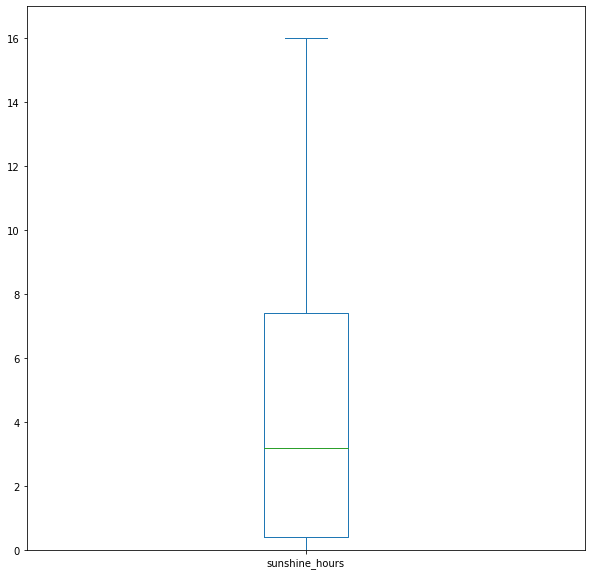

In [23]:
df91.plot(x = column_names[0], y=column_names[7],kind = 'box' ,ax = plt.axes(ylim=(0,17)), figsize=(10,10))

<AxesSubplot:>

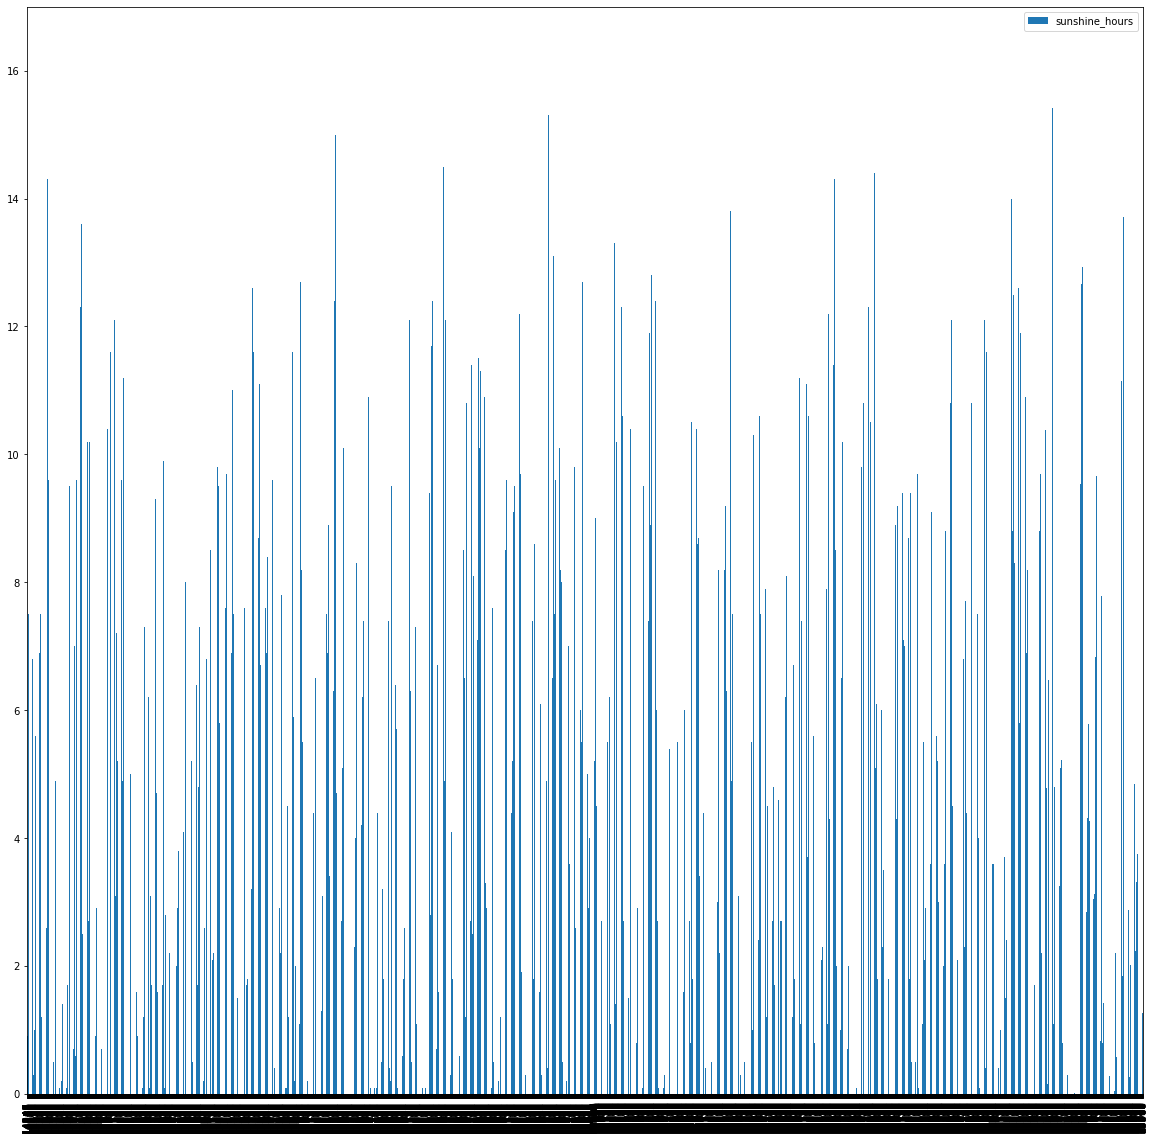

In [24]:
df91.plot(y=column_names[7],kind = 'bar' ,ax = plt.axes(ylim=(0,17)), figsize=(20,20))

<AxesSubplot:>

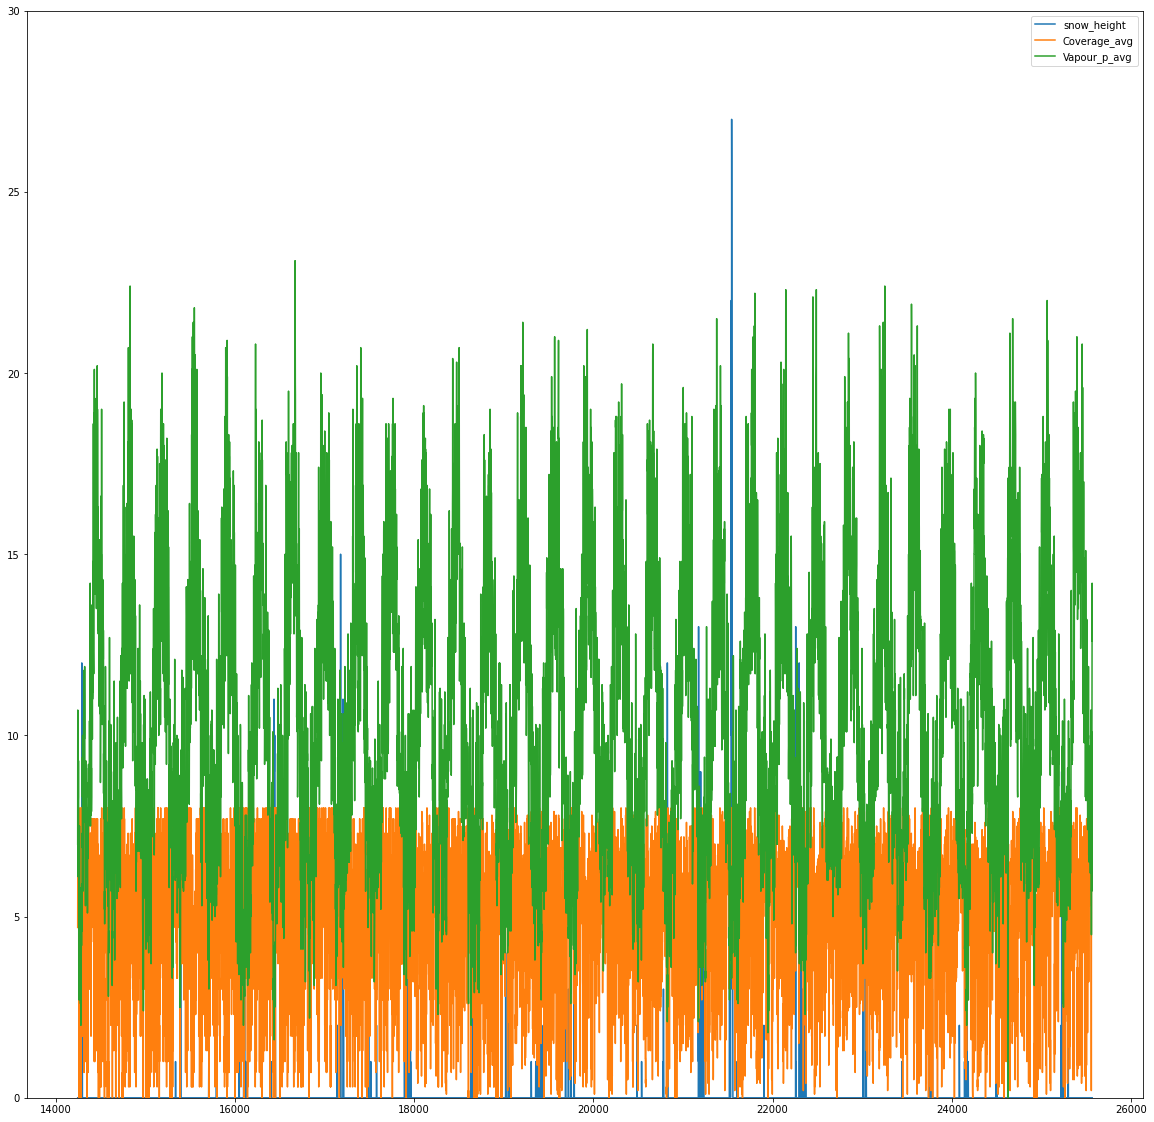

In [25]:
ax2 = plt.axes(ylim = (0,30))
ax2.grid(axis='y')
df91.plot(y=column_names[8:11], ax = ax2, figsize=(20,20))

<AxesSubplot:>

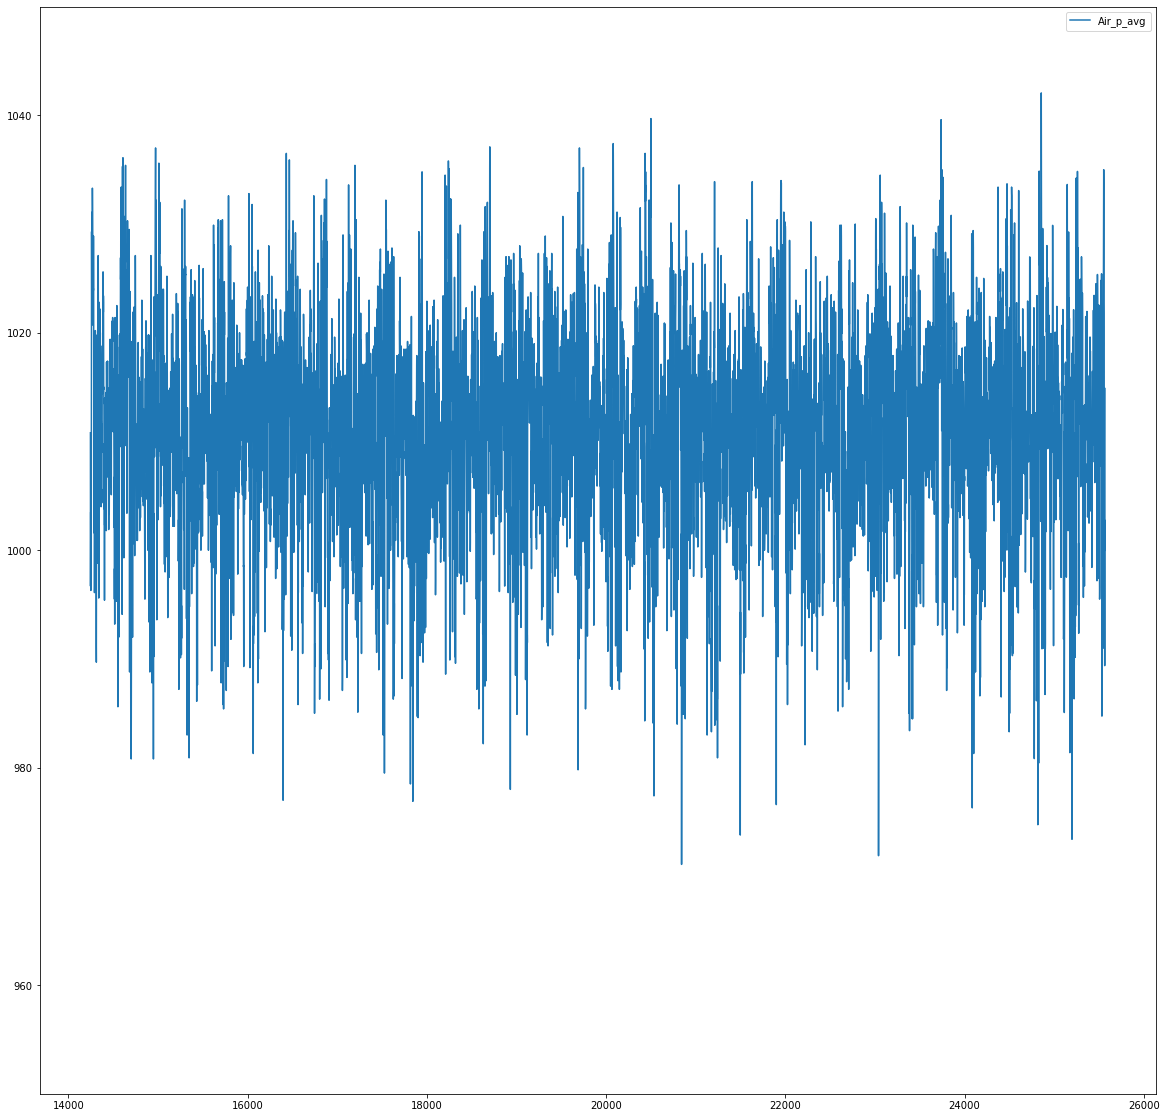

In [26]:
df91.plot(y=column_names[11], ax = plt.axes(ylim=(950,1050)), figsize=(20,20))

<AxesSubplot:>

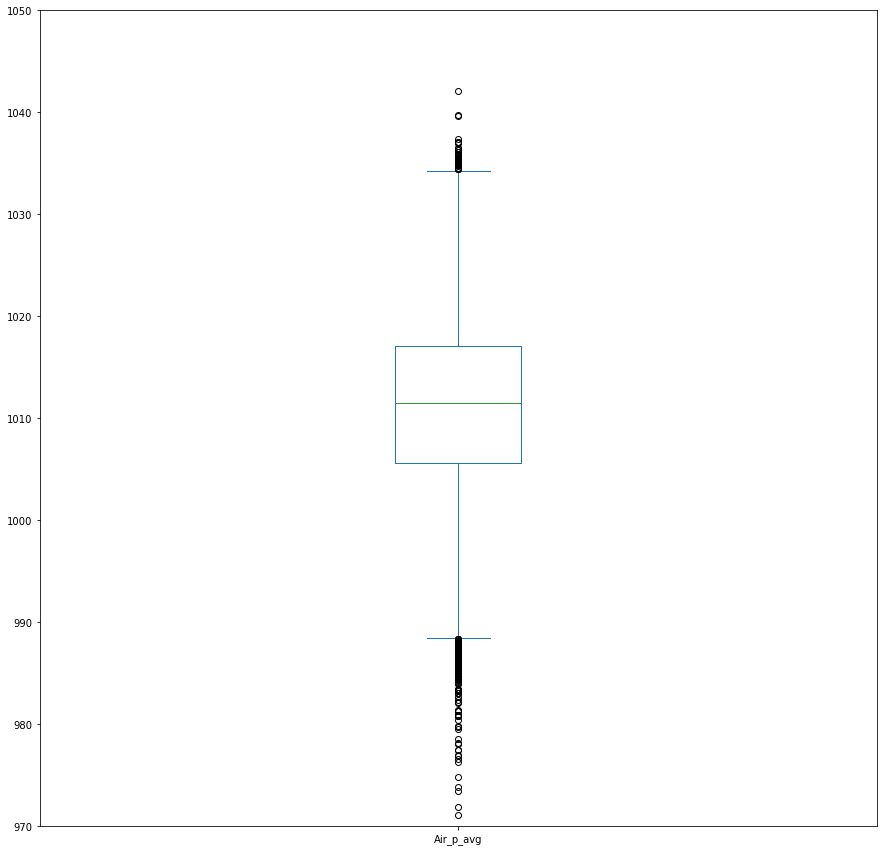

In [27]:
df91.plot(y=column_names[11], kind = 'box', ax = plt.axes(ylim=(970,1050)), figsize=(15,15))

<AxesSubplot:>

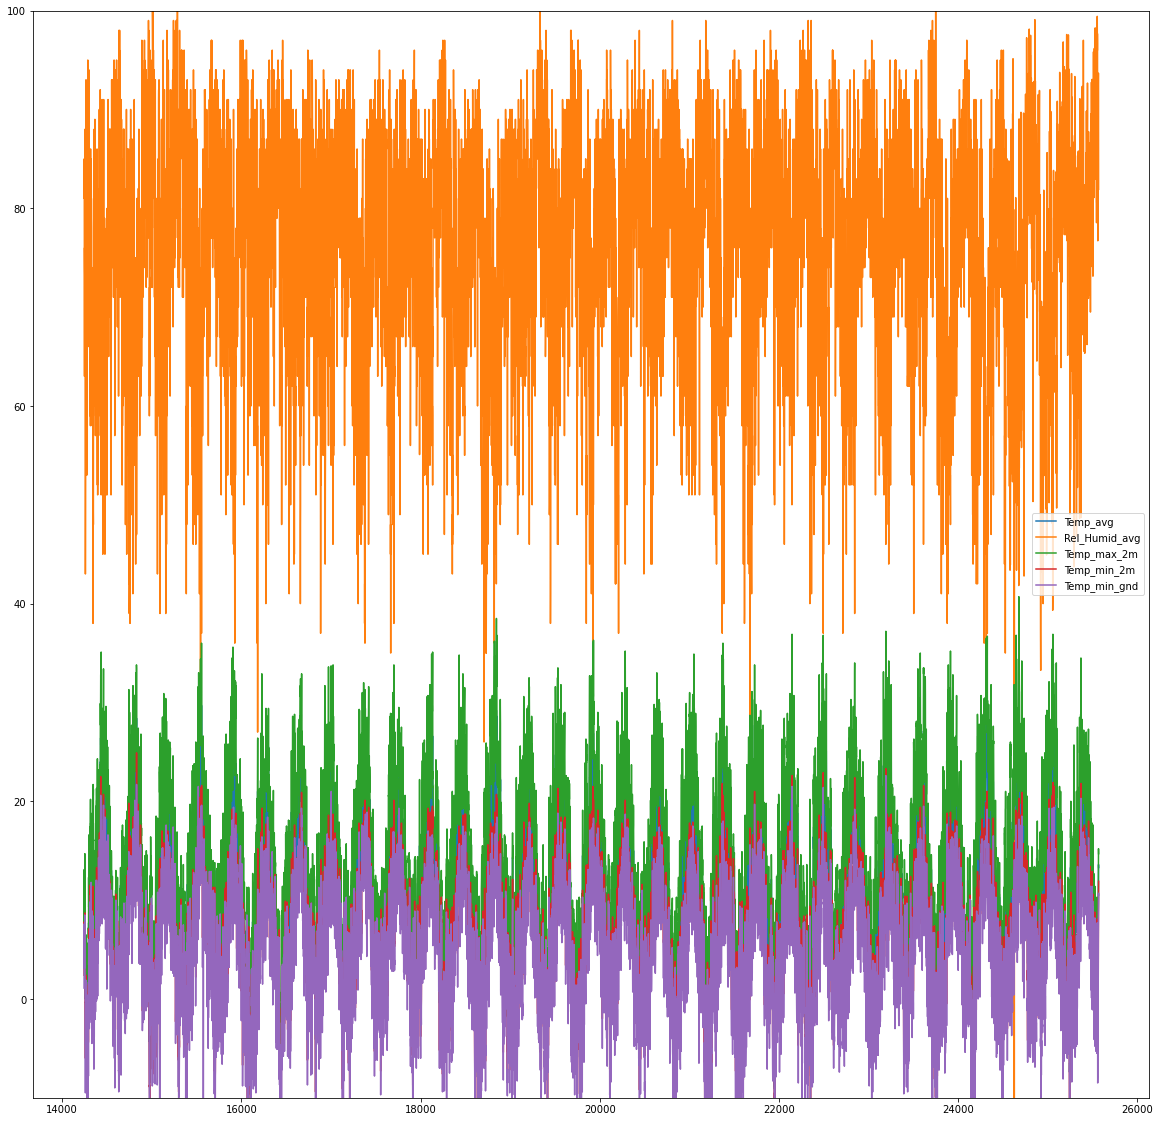

In [28]:
df91.plot(y=column_names[12:17], ax = plt.axes(ylim=(-10,100)), figsize=(20,20))

According to the documentation values given with -999 are values which were not recorded.
The temperature values seems to be quite similar. **I should check, if there is a high correlation among them**

Vapor pressure and temperature seem to correlate, too. There seems to be also a correlation between air pressure and relative humidity, which is interesting considering, that rel. humid is a function of air temperature.

In [35]:
df91['Date']=df91['Date'].astype('string')

/tmp/wsuser/ipykernel_215/556079451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df91['Date']=df91['Date'].astype('string')


In [39]:
df91.dtypes

Date                      string
Qual_wind                  int64
Wind_max                 float64
Wind_avg                 float64
Qual_precep                int64
Precepitation            float64
Type_of_Precipitation      int64
sunshine_hours           float64
snow_height                int64
Coverage_avg             float64
Vapour_p_avg             float64
Air_p_avg                float64
Temp_avg                 float64
Rel_Humid_avg            float64
Temp_max_2m              float64
Temp_min_2m              float64
Temp_min_gnd             float64
dtype: object

In [17]:
df91['Date']= pd.to_datetime(df91['Date'], format = "%Y%m%d")
df91.head()

C:\Users\sager\AppData\Local\Temp\ipykernel_6664\3402100033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df91['Date']= pd.to_datetime(df91['Date'], format = "%Y%m%d")


,Date,Qual_wind,Wind_max,Wind_avg,Qual_precep,Precepitation,Type_of_Precipitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Temp_max_2m,Temp_min_2m,Temp_min_gnd
14245,1991-01-01,10,11.5,4.5,10,7.1,6,3.7,0,4.7,7.0,1010.8,4.8,82.0,6.8,2.4,1.1
14246,1991-01-02,10,22.0,9.2,10,3.8,6,0.0,0,7.3,10.7,996.7,11.4,81.0,12.9,5.0,3.7
14247,1991-01-03,10,23.0,5.3,10,9.2,6,0.0,0,7.3,9.6,1001.9,8.6,85.0,13.1,7.8,7.6
14248,1991-01-04,10,15.7,6.2,10,0.4,6,4.1,0,6.3,7.9,1003.5,6.8,79.0,9.6,5.6,5.6
14249,1991-01-05,10,17.8,7.7,10,2.9,6,1.1,0,5.3,7.1,1000.4,6.6,74.0,7.6,3.9,3.1


In [18]:
df91.tail()

,Date,Qual_wind,Wind_max,Wind_avg,Qual_precep,Precepitation,Type_of_Precipitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Temp_max_2m,Temp_min_2m,Temp_min_gnd
25563,2021-12-27,3,10.8,5.9,3,1.0,6,1.267,0,7.0,8.9,995.08,6.5,92.00,8.4,3.7,3.4
25564,2021-12-28,3,16.8,5.8,3,14.9,6,0.100,0,7.1,10.4,989.38,8.7,92.58,10.8,6.6,6.1
25565,2021-12-29,3,10.5,5.2,3,6.2,6,0.183,0,7.8,11.3,1001.27,9.7,93.67,13.1,8.4,7.9
25566,2021-12-30,3,14.1,6.5,3,0.1,6,0.000,0,7.6,14.2,1010.73,13.6,90.83,15.2,11.5,10.7
25567,2021-12-31,3,12.0,5.7,3,0.0,6,1.433,0,6.9,12.6,1014.87,13.3,81.92,14.7,11.9,10.5


In [19]:
df_clean = df91.drop(df91[df91['Wind_max'] == -999].index)

In [20]:
rows_to_drop = []
for i in column_names:
    temp = df91[df91[i] == -999].index
    rows_to_drop.extend(temp)

In [21]:
df_clean = df91.drop(rows_to_drop)

In [22]:
df_clean.describe()

,Qual_wind,Wind_max,Wind_avg,Qual_precep,Precepitation,Type_of_Precipitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Temp_max_2m,Temp_min_2m,Temp_min_gnd
count,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,8.774906,10.761157,3.974791,9.35876,2.062146,4.069685,4.369322,0.113527,5.221039,10.372233,1011.145100,11.073846,75.387749,15.262484,6.749314,4.727277
std,2.659968,4.009882,1.779277,2.01937,4.239138,2.988936,4.243528,0.995998,2.101599,3.885992,9.167585,6.784468,11.690102,7.906844,6.175643,6.461611
min,3.000000,2.100000,0.300000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,971.100000,-14.600000,26.000000,-10.900000,-20.800000,-29.200000
25%,10.000000,7.900000,2.600000,10.00000,0.000000,0.000000,0.400000,0.000000,4.000000,7.300000,1005.700000,6.100000,68.000000,9.200000,2.300000,0.200000
50%,10.000000,10.200000,3.700000,10.00000,0.100000,6.000000,3.200000,0.000000,5.700000,9.900000,1011.500000,11.100000,77.000000,15.200000,7.000000,5.000000
75%,10.000000,12.900000,5.100000,10.00000,2.300000,6.000000,7.400000,0.000000,7.000000,13.200000,1017.100000,16.200000,84.000000,21.200000,11.500000,9.600000
max,10.000000,40.300000,13.000000,10.00000,57.400000,8.000000,16.000000,27.000000,8.000000,23.100000,1042.060000,31.200000,100.000000,40.700000,24.900000,22.600000


In [23]:
df_clean.to_csv('Climate_day_train.csv')